In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
%matplotlib inline 

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Load data 
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

test_data['Survived'] = np.NaN

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Project Planning

In [3]:
# Understand nature of the data .info() and .describe()
# Histograms and boxplots
# Value counts
# Missing data
# Correlation between metrics
# Explore interesting themes ?
    # Wealthy survive?
    # By location?
    # Location?
    # Young and wealthy?
    # etc
# Feature engineering
# Preprocess data
# Scaling?
# Model Baseline
# Model Comparison w/ CV

## Data Exploration & Visualization

In [4]:
# Look at data types and null counts of trianing data with .info()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Get a better understanding of numeric tendencies of training data with .describe()
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Separate numeric and categorical columns
df_numeric = train_data[['Age','SibSp','Parch','Fare']] # Excluding PassengerId
df_categorical = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


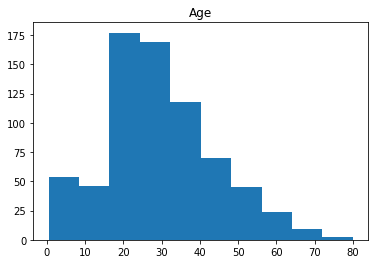

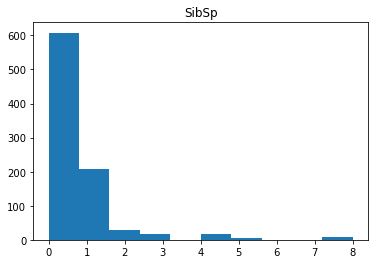

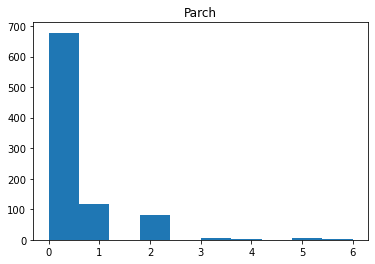

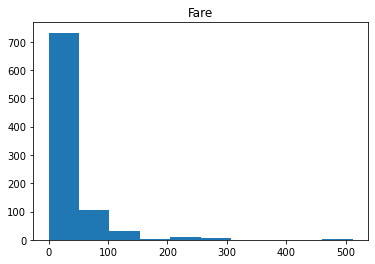

In [7]:
# Plot histograms for each numeric value
for i in df_numeric.columns:
    plt.hist(df_numeric[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


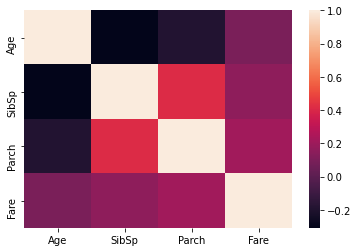

In [8]:
# Look at the correlations between features
print(df_numeric.corr())
sns.heatmap(df_numeric.corr())

In [9]:
# Compare survival rate across numeric features, Age, SibSp, Parch, Fare
pd.pivot_table(train_data, index='Survived', values=['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


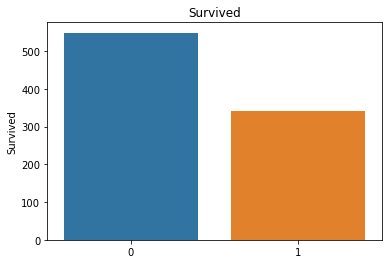

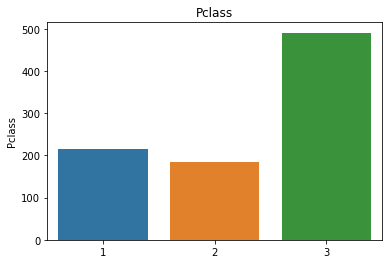

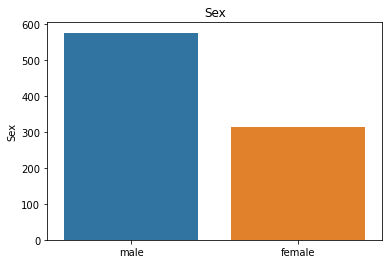

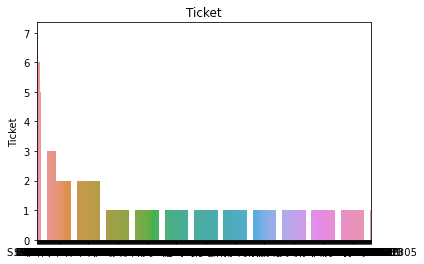

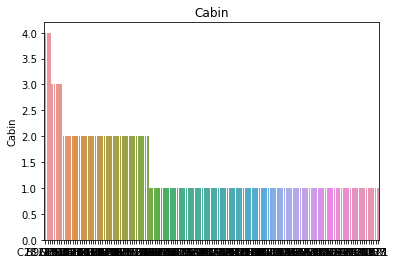

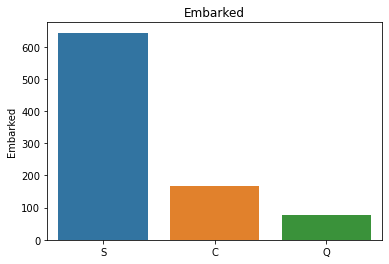

In [10]:
# Plot barplots for categorical variables
for i in df_categorical.columns:
    sns.barplot(df_categorical[i].value_counts().index,df_categorical[i].value_counts()).set_title(i)
    plt.show()

In [11]:
# Compare survival rate across categorical features, Pclass, Sex, Ticket, Cabin, Embarked
print(pd.pivot_table(train_data, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'))
print(pd.pivot_table(train_data, index='Survived', columns='Sex', values='Ticket', aggfunc='count'))
print(pd.pivot_table(train_data, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Data Cleaning

In [12]:
# Check for duplicated entries
sum(train_data.duplicated())

0

## Feature Engineering

In [13]:
# Join training and test data sets for feature engineering
train_data['train_test'] = 1
test_data['train_test'] = 0

train_target = train_data.Survived

all_data = pd.concat([train_data,test_data])
all_data.drop(['Survived'], axis=1, inplace=True)
all_data.reset_index()
all_data.drop(['PassengerId'], inplace=True, axis=1)

In [14]:
print(all_data.shape)

(1309, 11)


In [15]:
# Extracting passenger titles
all_data['Title'] = all_data['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [16]:
# Drop 'Name' feature and dummy encode 'Title' feature
title_dummies = pd.get_dummies(all_data['Title'])
all_data = pd.concat([all_data, title_dummies], axis=1)
all_data.drop(['Name'], inplace=True, axis=1)

In [17]:
# Consider how age is correlated with other features
grouped_train = all_data.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

grouped_median_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     27 non-null     object 
 1   Pclass  27 non-null     int64  
 2   Title   27 non-null     object 
 3   Age     27 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 992.0+ bytes


In [18]:
# Deal with missing values in Age
# Impute with value based on 'Sex', 'Pclass', 'Age'
# fill_age() function from ahmedbesbes on GitHub/Medium
def fill_age(row):
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) & 
        (grouped_median_train['Title'] == row['Title']) & 
        (grouped_median_train['Pclass'] == row['Pclass'])
    ) 
    if grouped_median_train[condition]['Age'].values.any():
        return int(grouped_median_train[condition]['Age'].values[0])

all_data['Age'] = all_data.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'], axis=1)

sum(all_data.Age.isna())

1

In [19]:
# Impute last one with overall median age
all_data.Age = all_data.Age.fillna(all_data.Age.median())
assert sum(all_data.Age.isna()) == 0

In [20]:
# Drop title
all_data.drop(['Title'], inplace=True, axis=1)

In [21]:
# Process fare 
# Impute with mean
print(sum(all_data.Fare.isna()))
all_data.Fare = all_data.Fare.fillna(all_data.Fare.mean())
assert sum(all_data.Fare.isna()) == 0

1


In [22]:
# Bin fare by quartiles

fare_bins = [all_data.Fare.min(),
            all_data.Fare.median(),
            all_data.Fare.quantile(.75),
            all_data.Fare.max(),]
all_data['binned_Fare'] = pd.cut(all_data.Fare, 
                                   bins=fare_bins, 
                                   labels=['3rd', '2nd', '1st'], # assuming low fare corresponds to lower class ticket
                                   right=True, 
                                   include_lowest=True) 

In [23]:
# Dummy encode binned fare and concatenate to all_data
# Drop binned fare feature
fare_dummies = pd.get_dummies(all_data['binned_Fare'], prefix='Fare')
all_data = pd.concat([all_data, fare_dummies], axis=1)
all_data.drop(['binned_Fare'], inplace=True, axis=1)

In [24]:
# Deal with missing values in Embarked
# Impute with mode
print(sum(all_data.Embarked.isna()))
all_data.Embarked.fillna(all_data.Embarked.mode().iloc[0], inplace=True)
all_data.dropna(subset=['Embarked'], inplace=True)
assert sum(all_data.Embarked.isna()) == 0

2


In [25]:
# Dummy encode Embarked and drop Embarked feature
embarked_dummies = pd.get_dummies(all_data['Embarked'], prefix='Embarked')
all_data = pd.concat([all_data, embarked_dummies], axis=1)
all_data.drop(['Embarked'], inplace=True, axis=1)

In [26]:
# Deal with missing values in Cabin
# Impute with U = unmarked cabin
print(sum(all_data.Cabin.isna()))
all_data.Cabin.fillna('U', inplace=True)
assert sum(all_data.Cabin.isna()) == 0

1014


In [27]:
# Bin by cabin letter and dummy encode and concatenate to all_data
# Drop 'Cabin' feature and 'Cabin_letter'
all_data['Cabin_letter'] = all_data['Cabin'].map(lambda c: c[0])
cabin_dummies = pd.get_dummies(all_data['Cabin_letter'], prefix='Cabin')
all_data = pd.concat([all_data, cabin_dummies], axis=1)
all_data.drop(['Cabin_letter', 'Cabin'], inplace=True, axis=1)

In [28]:
# Dummy encode sex (mapping female --> 0 /male --> 1)
all_data['Sex'] = all_data['Sex'].map({'male':1, 'female':0})

In [29]:
# Dummy encode Pclass (1/2/3) and drop 'Pclass feature'
pclass_dummies = pd.get_dummies(all_data['Pclass'], prefix='Pclass')
all_data = pd.concat([all_data, pclass_dummies], axis=1)
all_data.drop(['Pclass'], inplace=True, axis=1)

In [30]:
# Feature engineer 'Family_Size' with Parch and SibSp + 1 for passenger themselves
all_data['Family_Size'] = all_data['Parch'] + all_data['SibSp'] + 1

# Bin / feature engineer 'single_family', 'small_family', 'large_family' based on 'Family_Size'
all_data['single_family'] = all_data['Family_Size'].map(lambda s: 1 if s == 1 else 0)
all_data['small_family'] = all_data['Family_Size'].map(lambda s: 1 if 2 <= s <= 4 else 0)
all_data['large_family'] = all_data['Family_Size'].map(lambda s: 1 if 5 <= s else 0)

In [31]:
# Process 'Ticket' feature
# Extract prefix of each ticket, if no prefix impute 'XXX'
# Dummy encode 'Ticket_prefix' feature
# cleanTicket() function from ahmedbesbes on GitHub/Medium

def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
        
all_data['Ticket'] = all_data['Ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(all_data['Ticket'], prefix='Ticket')
all_data = pd.concat([all_data, tickets_dummies], axis=1)
all_data.drop('Ticket', inplace=True, axis=1)

In [32]:
## FURTHER FEATURE ENGINEERING
# -- Age by other attributes

In [33]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 83 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             1309 non-null   int64  
 1   Age             1309 non-null   float64
 2   SibSp           1309 non-null   int64  
 3   Parch           1309 non-null   int64  
 4   Fare            1309 non-null   float64
 5   train_test      1309 non-null   int64  
 6   Capt            1309 non-null   uint8  
 7   Col             1309 non-null   uint8  
 8   Don             1309 non-null   uint8  
 9   Dona            1309 non-null   uint8  
 10  Dr              1309 non-null   uint8  
 11  Jonkheer        1309 non-null   uint8  
 12  Lady            1309 non-null   uint8  
 13  Major           1309 non-null   uint8  
 14  Master          1309 non-null   uint8  
 15  Miss            1309 non-null   uint8  
 16  Mlle            1309 non-null   uint8  
 17  Mme             1309 non-null   ui

In [34]:
all_data.shape

(1309, 83)

## Feature Selection

In [35]:
# Recover train and test data sets! 
X_train = all_data[all_data.train_test==1].drop(['train_test'], axis=1)
y_train = train_target
X_test = all_data[all_data.train_test==0].drop(['train_test'], axis=1)

# X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test==1].drop(['train_test'], axis=1)

feature_names = X_train.columns.values

In [36]:
# Tree-based model feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=feature_names)
feature_importances.sort_values(ascending=False).round(3)

Age              0.181
Fare             0.146
Sex              0.115
Mr               0.093
Miss             0.040
                 ...  
Dona             0.000
Ticket_STONOQ    0.000
Ticket_LP        0.000
Ticket_SCA3      0.000
Ticket_AQ4       0.000
Length: 82, dtype: float64

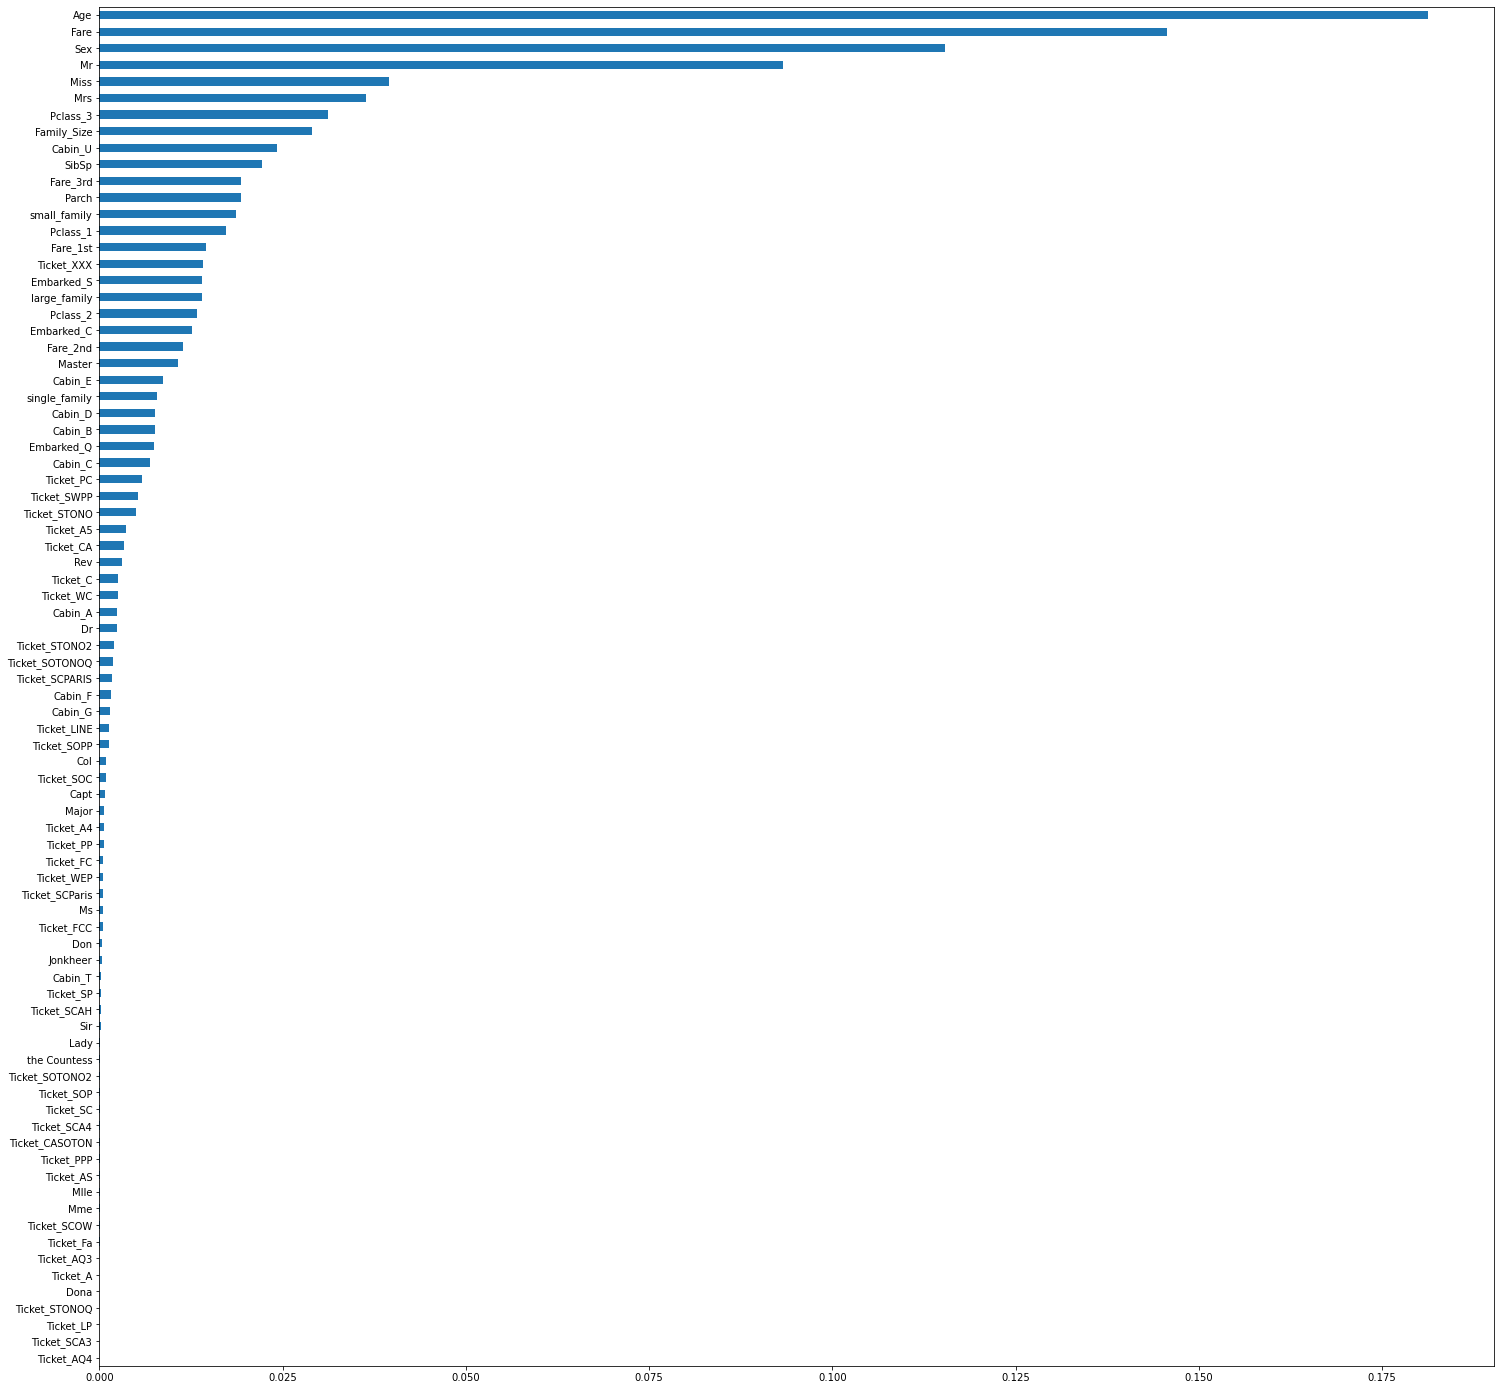

In [37]:
# Plot feature importances in a bar chart
fig, ax = plt.subplots(1, 1, figsize=(25,25))
feature_importances.sort_values().plot.barh(ax=ax)

In [38]:
# Use SelectFromModel to pick features of importance
from sklearn.feature_selection import SelectFromModel

sfm_rf = SelectFromModel(rf, prefit=True, threshold='mean')
X_train_reduced = sfm_rf.transform(X_train)
X_test_reduced = sfm_rf.transform(X_test)

In [39]:
print(X_train_reduced.shape)
print(X_test_reduced.shape)
reduced_features = feature_names[sfm_rf.get_support()]

(891, 20)
(418, 20)


## Scaling Data

In [40]:
# Scale data using StandardScaler 
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_reduced_scaled = pd.DataFrame(ss.fit_transform(X_train_reduced),columns=reduced_features)
X_test_reduced_scaled = pd.DataFrame(ss.fit_transform(X_test_reduced),columns=reduced_features)

## Basic Model Building

In [41]:
# Use cross-validation scoring to get sense of model accuracy
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from mlxtend.classifier import StackingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [42]:
# Score model function
def score_model(model, X, y):
    return cross_val_score(model, X, y, cv=5)

In [43]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)
knc = KNeighborsClassifier(n_neighbors=10)
gnb = GaussianNB()
lr = LogisticRegression(max_iter=2000)
lr_cv = LogisticRegressionCV(max_iter=2000)
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)

In [44]:
print(f'Random Forest Classifier: {np.mean(score_model(rfc, X_train_reduced_scaled, y_train))}')
print(f'K Neighbors Classifier: {np.mean(score_model(knc, X_train_reduced_scaled, y_train))}')
print(f'Gaussian NB: {np.mean(score_model(gnb, X_train_reduced_scaled, y_train))}')
print(f'Logistic Regression: {np.mean(score_model(lr, X_train_reduced_scaled, y_train))}')
print(f'Logistic Regression CV: {np.mean(score_model(lr_cv, X_train_reduced_scaled, y_train))}')
print(f'Gradient Boosting Classifier: {np.mean(score_model(gbc, X_train_reduced_scaled, y_train))}')
print(f'Support Vector Classifier: {np.mean(score_model(svc, X_train_reduced_scaled, y_train))}')

Random Forest Classifier: 0.8282781997363632
K Neighbors Classifier: 0.7957504237022157
Gaussian NB: 0.7822798317745276
Logistic Regression: 0.822666499278137
Logistic Regression CV: 0.819295712761283
Gradient Boosting Classifier: 0.8305128366078713
Support Vector Classifier: 0.826037285794991


## Hyperparameters Tuning

In [45]:
run_gs_rfc = False

if run_gs_rfc:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search_forest = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search_forest.fit(X_train_reduced_scaled, y_train)
    model = grid_search_forest
    parameters = grid_search_forest.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(X_train_reduced_scaled, y_train)

## 8. Ensemble Model Building

In [46]:
ensemble = [RandomForestClassifier(bootstrap=False, 
                                  max_depth=4, 
                                  max_features='sqrt', 
                                  min_samples_leaf=1, 
                                  min_samples_split=3, 
                                  n_estimators=50),
           gbc,
           svc]

stc = StackingClassifier(ensemble, LogisticRegression())

print(f'Support Vector Classifier: {np.mean(score_model(stc, X_train_reduced_scaled, y_train))}')


Support Vector Classifier: 0.8305128366078713


## 9. Results

In [47]:
# Predictions using stacking classifier

# gbc.fit(X_train_reduced_scaled, y_train)
predictions = model.predict(X_test_reduced_scaled) 

output = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived':predictions})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('mysubmission.csv', index=False)

print("Your submission was successfully saved!")

Your submission was successfully saved!
